# 1 Imports

In [1]:
# Imports

import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

# 2 Try-out

## 2.1 Sentiment Analysis

In [2]:
classifier = pipeline('sentiment-analysis')
result = classifier("I'm super exicted to be on the way to LLM mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.5991434454917908}]


## 2.2 Named Entity Recognition

In [3]:
ner = pipeline('ner', grouped_entities=True)
result = ner("Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'entity_group': 'PER', 'score': 0.99918306, 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': 0.9986908, 'word': 'United States', 'start': 43, 'end': 56}]


c:\Users\filip\GitHub\Mastering-LLM-Agentic-AI\venv\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


## 2.3 Question Answering with Context

In [4]:
question_answerer = pipeline('question-answering')
result = question_answerer(question = "Who was the 44th president of the United States?", context = "Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


{'score': 0.9889456033706665, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


## 2.4 Text Summarization

In [5]:
summarizer = pipeline('summarization')
text = """ The Hugging Face transformers library is an incredible versatile and powerful tool for natural langauge processing (NLP).
It allows users to perform a wide range of tasks such as classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
result = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(result[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


 The Hugging Face transformers library is an incredible versatile and powerful tool for natural langauge processing . It allows users to perform a wide range of tasks such as classification, named entity recognition, and question answering .


## 2.5 Translation

In [6]:
traslator = pipeline("translation_en_to_fr")
result = traslator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


## 2.6 Classification

In [7]:
classifier = pipeline('zero-shot-classification')
result = classifier("Hugging Face's Transfoermers library is amazing!", candidate_labels = ['technology', 'sports', 'politics'])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


{'sequence': "Hugging Face's Transfoermers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9860173463821411, 0.009121352806687355, 0.004861327353864908]}


## 2.7 Text Generation

In [8]:
generator = pipeline('text-generation')
result = generator("If there's one thing I want you to remeber about using HuggingFace pipelie it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remeber about using HuggingFace pipelie it's being able to do the following:

export PATH=:<br>/your/path/to/fonts export PATH=


## 2.8 Audio Generation

In [9]:
synthesizer = pipeline('text-to-speech', 'microsoft/speecht5_tts')

embeddings_dataset = load_dataset('Matthijs/cmu-arctic-xvectors', split='validation')
speaker_embedding = torch.tensor(embeddings_dataset[7306]['xvector']).unsqueeze(0).to('cuda')

speech = synthesizer("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write('speech.wav', speech['audio'], samplerate=speech["sampling_rate"])
Audio('speech.wav')

Device set to use cuda:0


## 2.9 Image Generation

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

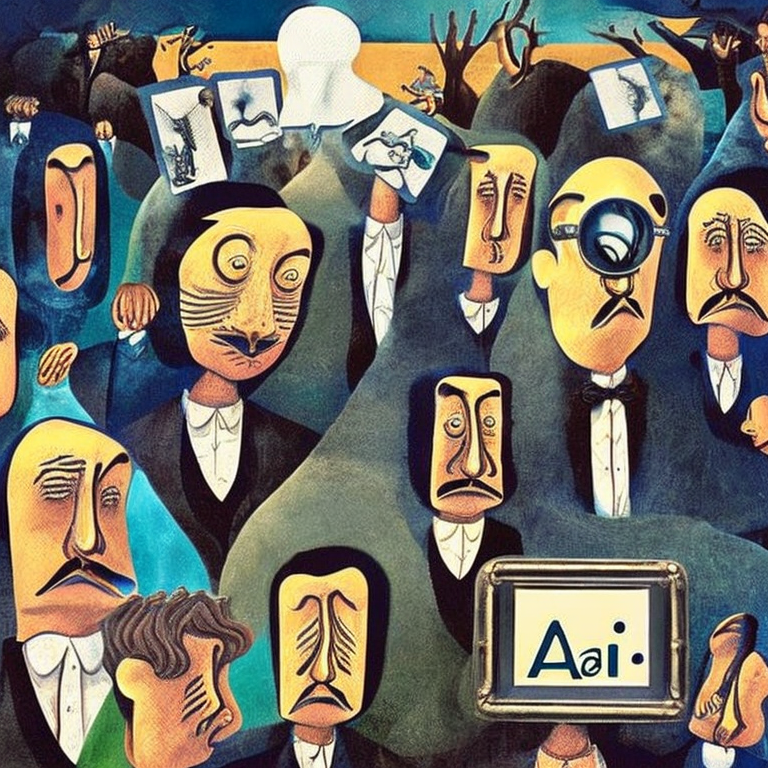

In [10]:
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant='fp16'
).to('cuda')

text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali."
image = image_gen(prompt=text).images[0]
image